In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape 

(200, 5)

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Unnamed: 0       Axes(0.125,0.712609;0.168478x0.167391)
TV            Axes(0.327174,0.712609;0.168478x0.167391)
Radio         Axes(0.529348,0.712609;0.168478x0.167391)
Newspaper     Axes(0.731522,0.712609;0.168478x0.167391)
Sales            Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

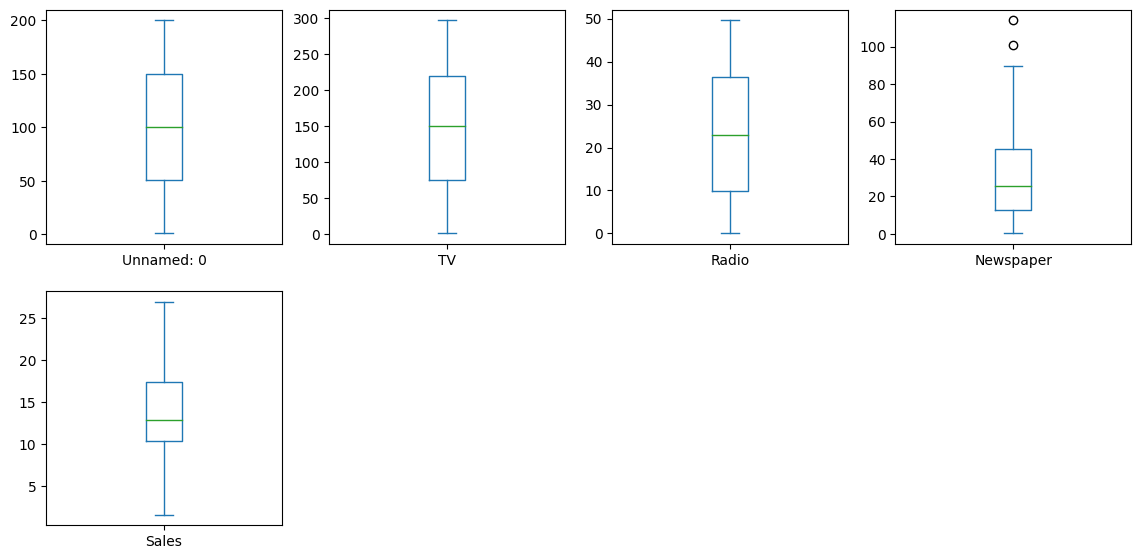

In [10]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 14))

In [11]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

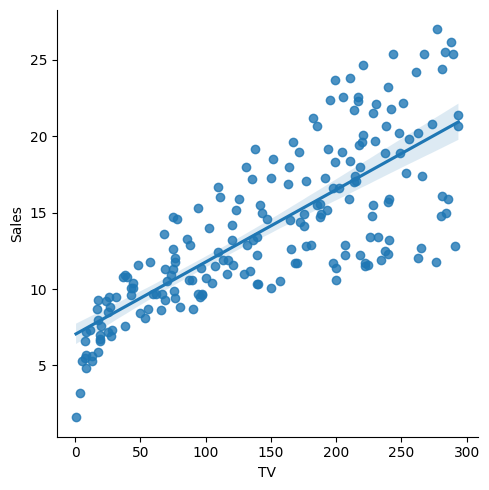

In [13]:
import seaborn as sns
sns.lmplot(x='TV', y='Sales', data=df)

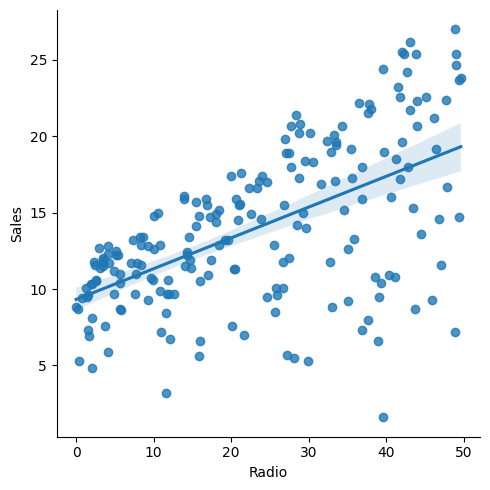

In [14]:
import seaborn as sns
sns.lmplot(x='Radio', y='Sales', data=df)

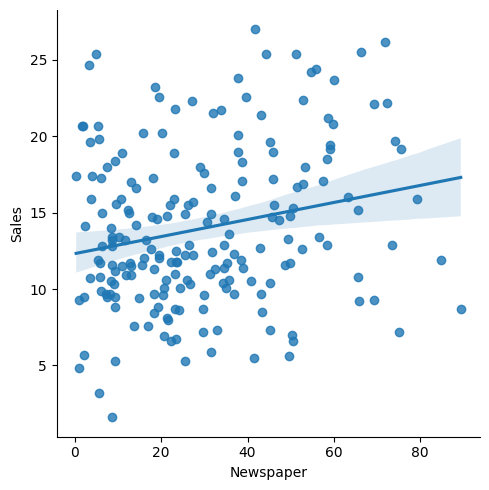

In [15]:
import seaborn as sns
sns.lmplot(x='Newspaper', y='Sales', data=df)

In [16]:
df.corr()['Sales']

Unnamed: 0   -0.054703
TV            0.779121
Radio         0.576748
Newspaper     0.219555
Sales         1.000000
Name: Sales, dtype: float64

In [17]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

In [18]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

1.5595116807736777
90.98946359000558


In [25]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})
act_predict.head(5)

,Actual,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808


<Axes: >

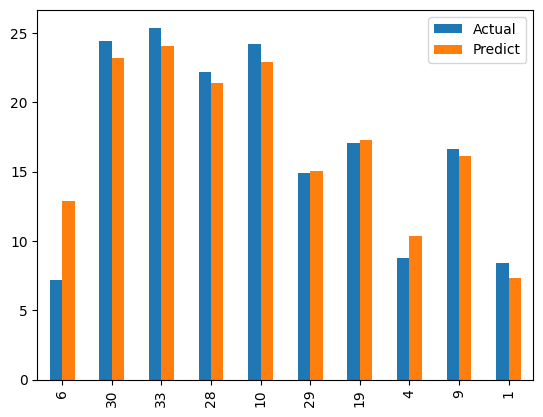

In [26]:
act_predict.sample(10).plot(kind='bar')

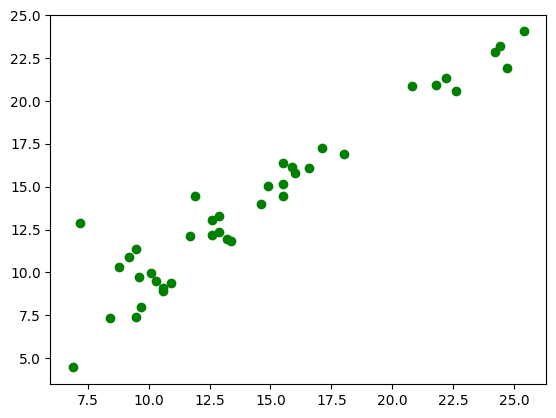

In [27]:
plt.scatter(y_test,y_pred,c='g')

In [28]:
# Calculate the R-squared value for the train data
train_score = model.score(X_train, y_train)

# Calculate the R-squared value for the test data
test_score = model.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("R-squared value for train data:", train_score*100)
print("R-squared value for test data:", test_score*100)

R-squared value for train data: 88.98322019518987
R-squared value for test data: 90.98946359000558
